In [1]:
import parameter_creation as pc
import projections as proj
import SIFT_classes as SIFT
import multiprocessing

# Create or load parameter file

In [2]:
pc.create_parameter_file(cmb_resolution = 3.0, file_name = 'parameter_file_500.npy')

/home/bolocam/erapaport/Spectro_Imaging_Forecasting_Tool/parameter_creation.py:38: RuntimeWarning: invalid value encountered in true_divide
  ClTT = DlTT * 2 * np.pi / (ell * (ell + 1.))


# View Differential Intensity Projection

In [3]:
y = 5.4e-05
electron_temperature = 5.0 # KeV
peculiar_vel = 1e-11 # km/s
time = 288000 # Seconds
sides_long = 100
sides_lat = 100

In [4]:
# Hybrid 3-3-5 First choice
pix1 = 150
pix2 = 250
pix3 = 1000
pix4 = 1250
pix5 = 750

res1 = 17
res2 = 39
res3 = 26
res4 = 27
res5 = 40

hybrid_band = [{'name':'Band 1','nu_meanGHz':145,'rms':0.36,'type':'OLIMPO'},\
      {'name':'Band 2','nu_meanGHz':250,'rms':0.36,'type':'OLIMPO'},\
      {'name':'Band 3','nu_meanGHz':365,'FBW':0.18,'nu_resGHz':res3,'N_pixels':pix3,'type':'spectrometric'},\
      {'name':'Band 4','nu_meanGHz':460,'FBW':0.15,'nu_resGHz':res4,'N_pixels':pix4,'type':'spectrometric'},\
      {'name':'Band 5','nu_meanGHz':660,'FBW':0.166,'nu_resGHz':res5,'N_pixels':pix5,'type':'spectrometric'}]

In [5]:
photometric_band = [{'name':'Band 1','nu_meanGHz':145,'rms':0.36,'type':'OLIMPO'},\
       {'name':'Band 2','nu_meanGHz':250,'rms':0.36,'type':'OLIMPO'},\
       {'name':'Band 3','nu_meanGHz':365,'rms':0.70,'type':'OLIMPO'},\
       {'name':'Band 4','nu_meanGHz':460,'rms':1.76,'type':'OLIMPO'}]

/home/bolocam/erapaport/Spectro_Imaging_Forecasting_Tool/SIFT_classes.py:179: RuntimeWarning: divide by zero encountered in log
  f = interp1d(np.log(datax), np.log(datay), kind='slinear', bounds_error=False, fill_value=0)


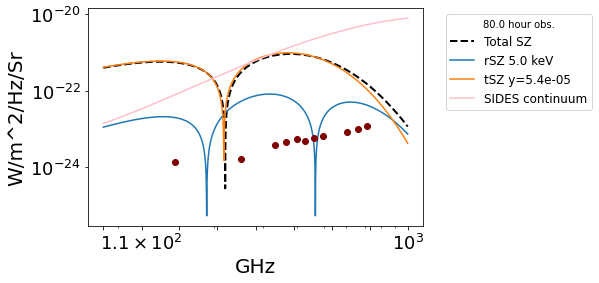

<Figure size 1600x1600 with 0 Axes>

In [6]:
proj.differential_intensity_projection(y, electron_temperature, peculiar_vel, sides_long, sides_lat, hybrid_band, time)

# Run Script

In [7]:
siftclass = SIFT.SpectralSimulation(y, electron_temperature, peculiar_vel, photometric_band, time)
p = multiprocessing.Process(target=siftclass.run_sim('test_run_101.npy','parameter_file_500.npy', processors_pool = 30, realizations = 100))
p.start()

FileNotFoundError: [Errno 2] No such file or directory: '/bolocam/bolocam/erapaport/Auxiliary/test_run_101'

# Analyze output

In [ ]:
proj.chain_projection('test_run_101.npy')

In [ ]:
proj.contour_plot_projection('test_run_101.npy')

In [ ]:
proj.contour_plot_double_projection('test_run_101.npy', 'test_run_102.npy')